## Data Processing

In [66]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [10, 8]

In [19]:
df = pd.read_csv('wikipedia/web-traffic-time-series-forecasting/train_1.csv', nrows=100)

In [20]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36,10.0


In [21]:
df.isna().sum().sum() # cells with missing values

8369

In [22]:
df.isna().any().sum() # cols with missing values

545

In [23]:
df.isna().any(axis=1).sum() # rows with missing values

32

In [24]:
df.fillna(0, inplace=True) # fill missing vals with 0
df.isna().sum().sum()

0

In [25]:
df.drop("Page", axis=1, inplace=True)

In [26]:
df.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18,20.0
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26,20.0
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4,17.0
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10,11.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36,10.0


## Models

### Simple Moving Average

In [27]:
arr = df.values
arr.shape

(100, 550)

In [28]:
arr[0][:10]

array([18., 11.,  5., 13., 14.,  9.,  9., 22., 26., 24.])

In [182]:
preds = [[0] for i in range(arr.shape[0])]
for i in range(1, arr.shape[1]): # i -> timestep
    for j in range(arr.shape[0]): # j -> webpage
        preds[j].append(sum(arr[j][:i])/i)

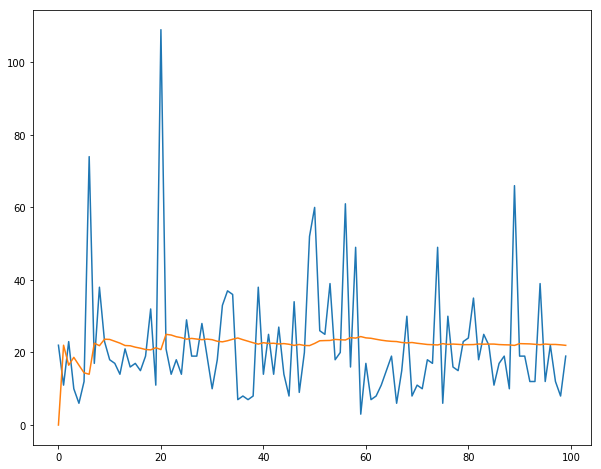

In [185]:
plt.plot(arr[20][:100])
plt.plot(preds[20][:100])

### One-Day Lookback

In [186]:
preds = [[0] for i in range(arr.shape[0])]
for i in range(1, arr.shape[1]): # i -> timestep
    for j in range(arr.shape[0]): # j -> webpage
        preds[j].append(arr[j][i-1])

In [188]:
arr[20][:3]

array([22., 11., 23.])

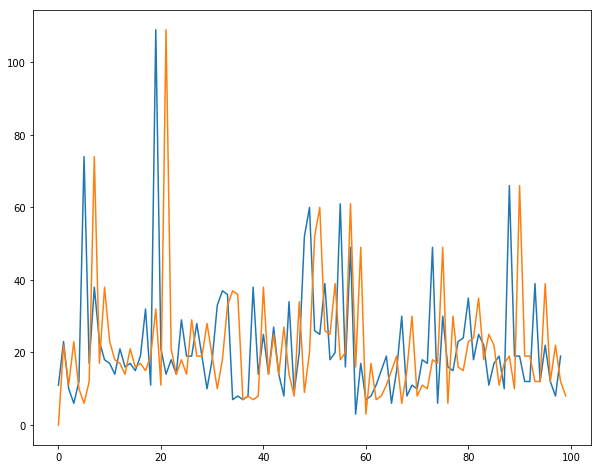

In [187]:
plt.plot(arr[20][1:100])
plt.plot(preds[20][:100])

### Exponential Moving Average

In [190]:
alpha = 0.1
preds = [[0] for i in range(arr.shape[0])]
for i in range(1, arr.shape[1]): # i -> timestep
    for j in range(arr.shape[0]): # j -> webpage
        if i == 1:
            preds[j].append(arr[j][i-1])
        else:
            preds[j].append(alpha*arr[j][i-1] + (1-alpha)*(preds[j][-1]))

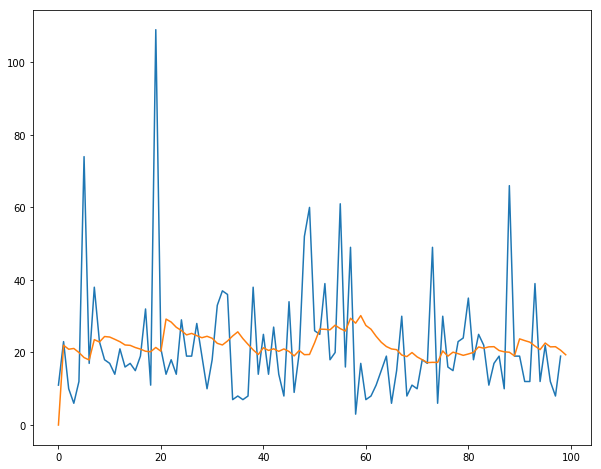

In [191]:
plt.plot(arr[20][1:100])
plt.plot(preds[20][:100])

### GRU-RNN

In [176]:
from keras.models import Sequential
from keras.layers import Input, Activation, GRU, Dense
from sklearn.preprocessing import scale

In [179]:
num_hidden_units = 64
num_outputs = 1
windows = [1, 7, 14, 30]

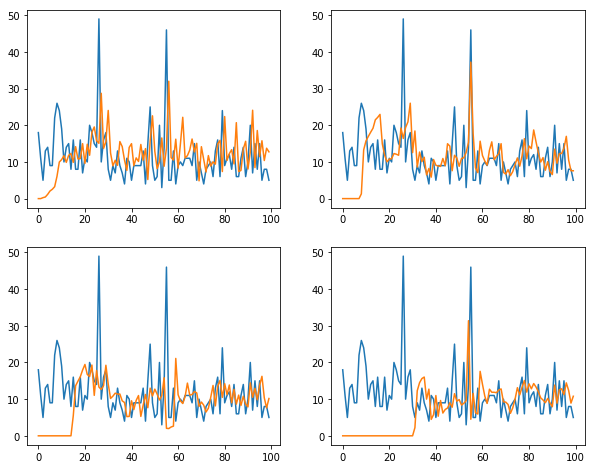

In [180]:
f, axs = plt.subplots(2,2)
for r, window in enumerate(windows):
    preds = np.zeros((arr.shape[0], arr.shape[1]))
    for w in range(window):
        preds[:,w] = 0
    model = Sequential()
    model.add(GRU(num_hidden_units))
    model.add(Dense(num_outputs))
    model.add(Activation('relu'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    for i in range(window, arr.shape[1]): # i -> timestep
        x = np.zeros((arr.shape[0], window, 1))
        y = np.zeros((arr.shape[0], 1))
        for j in range(arr.shape[0]): # j -> webpage
            x[j, :, 0] = arr[j][i - window : i]
            y[j][0] = arr[j][i]
        for k in range(window):
            x[:, k, :] = scale(x[:, k, :])
        p = model.predict(x).flatten()
        preds[:, i] = p
        model.fit(x, y, epochs=10, verbose=0)
    if r <= 1:
        axs[0, r].plot(arr[0][:100])
        axs[0, r].plot(preds[0][:100])
    else:
        axs[1, r-2].plot(arr[0][:100])
        axs[1, r-2].plot(preds[0][:100])